In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [4]:
data=pd.read_csv('/content/covid_19_clean_complete.csv')

In [5]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [7]:
import datetime
data['Date']=pd.to_datetime(data['Date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [9]:

#renaming the column
data.rename(columns={'Date':'date','Province/State':'states','Country/Region':'country','Lat':'lat','Long':'long',
            'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [10]:
data.tail()

,states,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
49067,NaN,Lesotho,-29.610000,28.233600,2020-07-27,505,12,128,365,Africa


In [11]:
data['active']=data['confirmed']-data['deaths']-data['recovered']

In [14]:
#to find all the cases on last date value
top=data[data['date']==data['date'].max()]

In [15]:
top

,states,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [16]:

#total number of confiremd case,active case,death case ,country wise

t=data.groupby('country')['confirmed','active','deaths'].sum().reset_index()

<ipython-input-16-6b9c2817c850>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  t=data.groupby('country')['confirmed','active','deaths'].sum().reset_index()


In [17]:
#using map visulization

fig=px.choropleth(t,locations='country',locationmode='country names',color='active',hover_name='country',range_color=[1,1500],color_continuous_scale='peach')
fig

<Axes: xlabel='date', ylabel='confirmed'>

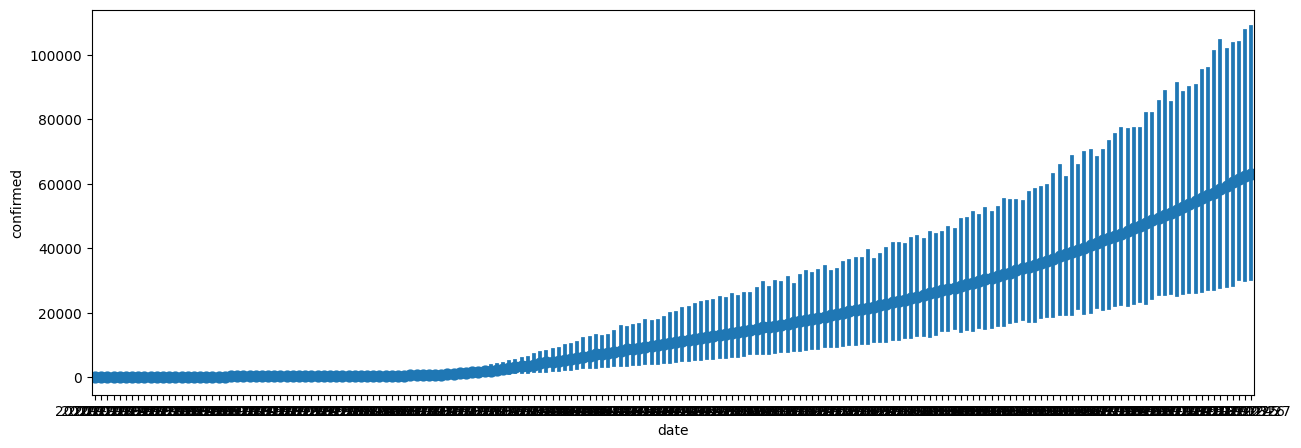

In [19]:
 #plot for confirmed case
plt.figure(figsize=(15,5))
sns.pointplot(y=data['confirmed'],x=data['date'])

In [20]:
t_case=data.groupby('date')['confirmed'].sum().reset_index()

In [21]:
t_case['date']=pd.to_datetime(t_case['date'])

<Axes: xlabel='date', ylabel='confirmed'>

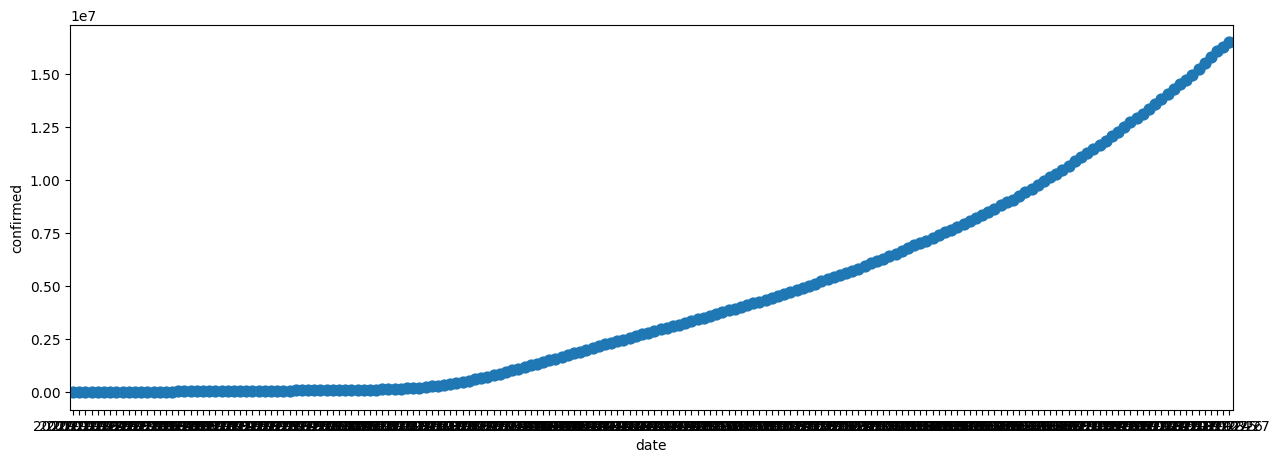

In [22]:
plt.figure(figsize=(15,5))
sns.pointplot(x=t_case.date,y=t_case.confirmed)

In [24]:
##Top 20 countries based on active cases
top_20=top.groupby('country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

In [25]:
top_20

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


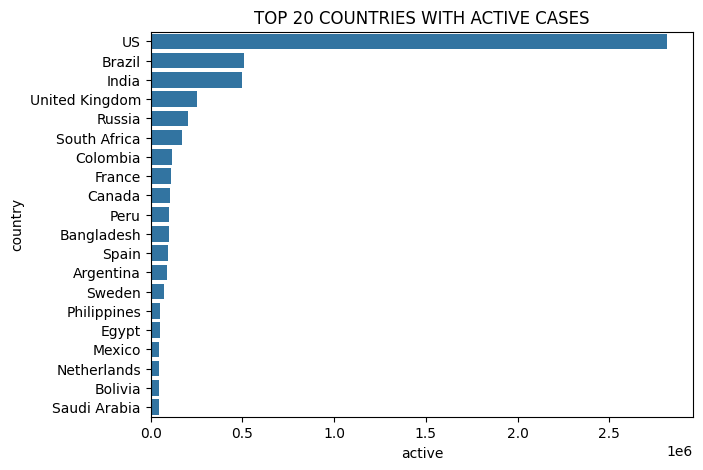

In [26]:

#TOP 20 COUNTRIES WITH ACTIVE CASES

plt.figure(figsize=(7,5))
sns.barplot(y=top_20.country,x=top_20.active)
plt.title('TOP 20 COUNTRIES WITH ACTIVE CASES')
plt.show()


In [27]:
#Top 20 countries based on recovered cases

top_20_recovered=top.groupby('country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()

In [28]:

top_20_recovered

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


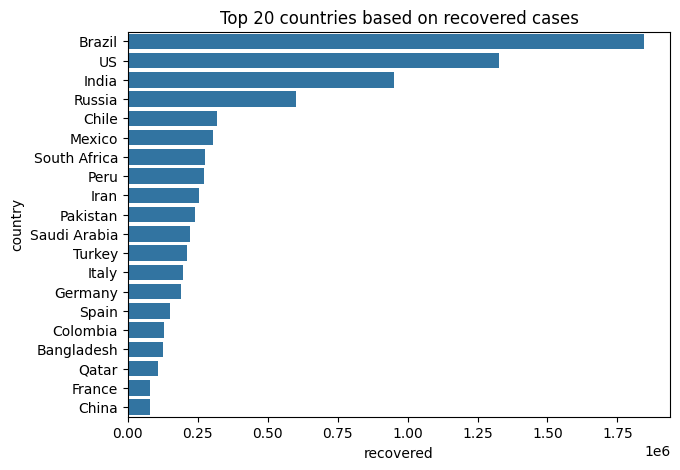

In [29]:

plt.figure(figsize=(7,5))
sns.barplot(x=top_20_recovered.recovered,y=top_20_recovered.country)
plt.title('Top 20 countries based on recovered cases')
plt.show()


In [30]:

Brazil=data[data.country=='Brazil']
Brazil.groupby('date')['recovered','deaths','recovered'].sum().reset_index()

<ipython-input-30-e49325ea4cb0>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,date,recovered,deaths,recovered
0,2020-01-22,0,0,0
1,2020-01-23,0,0,0
2,2020-01-24,0,0,0
3,2020-01-25,0,0,0
4,2020-01-26,0,0,0
...,...,...,...,...
183,2020-07-23,1620313,84082,1620313
184,2020-07-24,1693214,85238,1693214
185,2020-07-25,1785359,86449,1785359
186,2020-07-26,1812913,87004,1812913


In [31]:
Brazil=Brazil.iloc[9:].reset_index().drop('index',axis=1)

In [32]:


India=data[data.country=='India']
India.groupby('date')['recovered','deaths','recovered'].sum().reset_index()
India=India.iloc[9:].reset_index().drop('index',axis=1)

<ipython-input-32-be20e9c73bc8>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [33]:
US=data[data.country=='US']
US=US.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
US=US.iloc[9:].reset_index().drop('index',axis=1)

<ipython-input-33-bfd58030e9ef>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



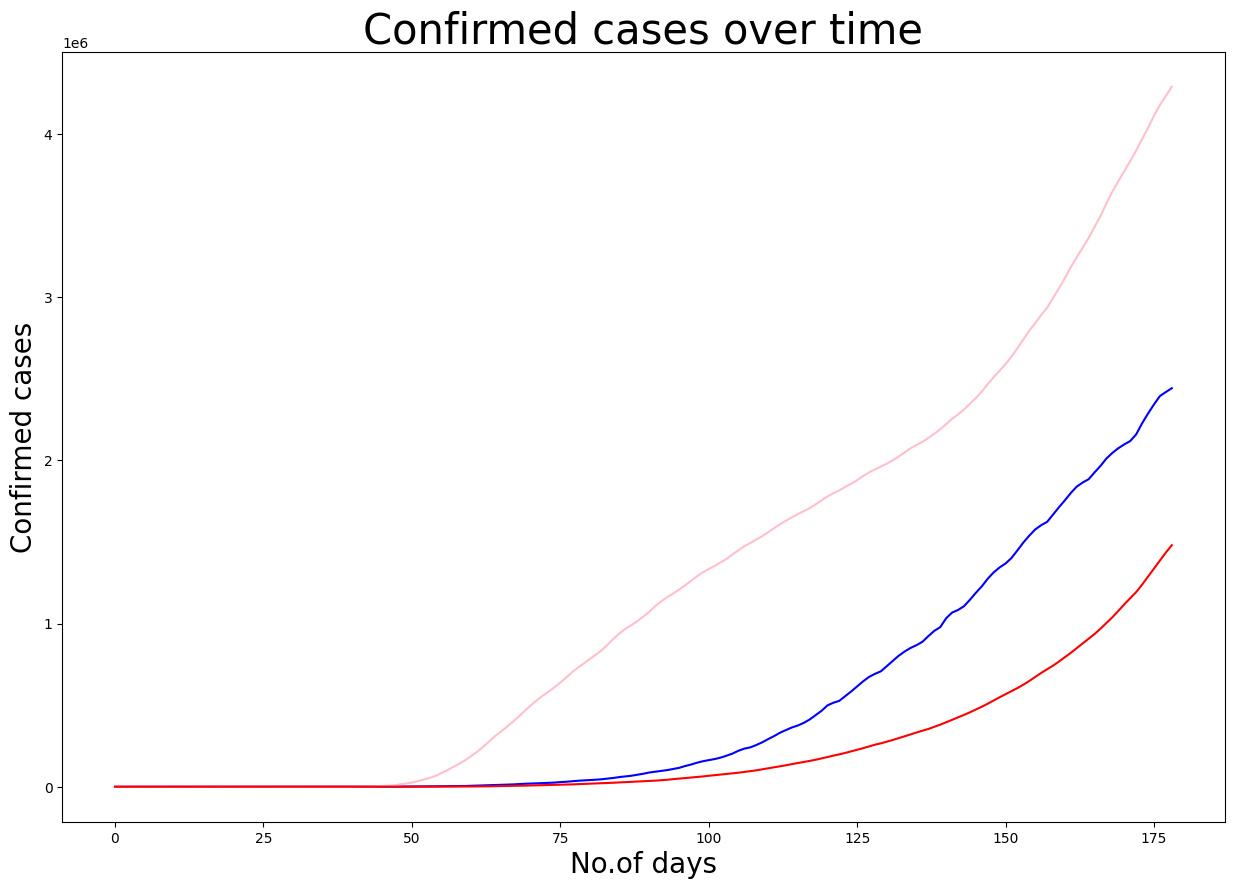

In [34]:
plt.figure(figsize=(15,10))
sns.lineplot(x=Brazil.index,y=Brazil.confirmed,color="Blue")
sns.lineplot(x=US.index,y=US.confirmed,color="Pink")
sns.lineplot(x=India.index,y=India.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

In [35]:

!pip install  prophet

In [36]:

from prophet import Prophet

In [37]:
data.head(2)

,states,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe


In [38]:
confirmed=data.groupby('date')['confirmed'].sum().reset_index()
deaths=data.groupby('date')['deaths'].sum().reset_index()
recovered=data.groupby('date')['recovered'].sum().reset_index()

In [39]:
#forecasting for conformed case

confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [40]:

confirmed.columns=['ds','y']
confirmed['ds']=pd.to_datetime(confirmed['ds'])
confirmed.tail()


,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [41]:

ml=Prophet(interval_width=0.95)
ml.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwbix_vv/iapd0pl9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjwbix_vv/7kbecl3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44184', 'data', 'file=/tmp/tmpjwbix_vv/iapd0pl9.json', 'init=/tmp/tmpjwbix_vv/7kbecl3q.json', 'output', 'file=/tmp/tmpjwbix_vv/prophet_modellprfe0pl/prophet_model-20240303101632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [42]:
future=ml.make_future_dataframe(periods=7,freq='D')


In [43]:
forecast=ml.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.067684e+04,-1.784539e+05,1.492238e+05
1,2020-01-23,-8.050948e+03,-1.743363e+05,1.632540e+05
2,2020-01-24,5.827455e+03,-1.525553e+05,1.686628e+05
3,2020-01-25,1.217668e+04,-1.490683e+05,1.689448e+05
4,2020-01-26,8.405020e+03,-1.558732e+05,1.680530e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.658644e+07,1.688881e+07
191,2020-07-31,1.695910e+07,1.680383e+07,1.712137e+07
192,2020-08-01,1.716676e+07,1.700232e+07,1.733094e+07
193,2020-08-02,1.736430e+07,1.718834e+07,1.753859e+07


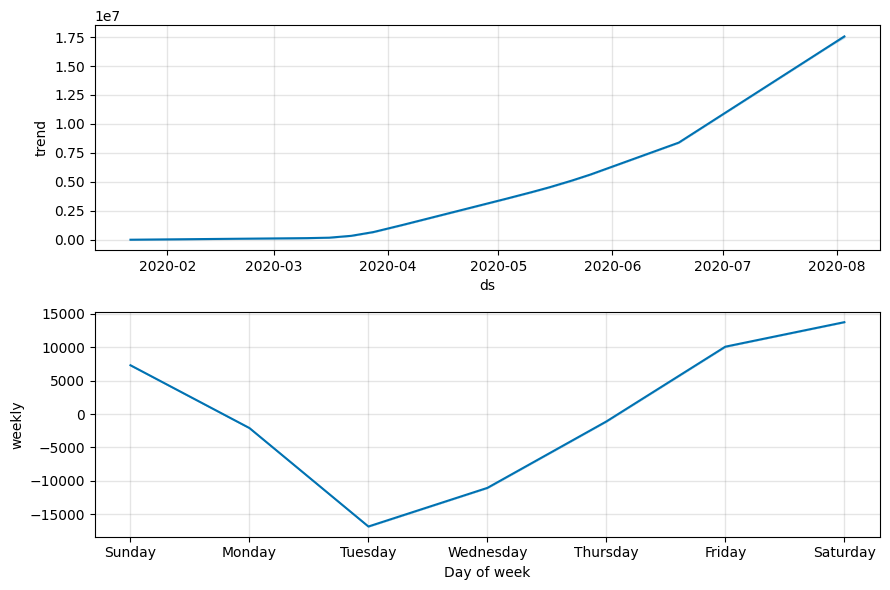

In [44]:

ml.plot_components(forecast)
plt.show()

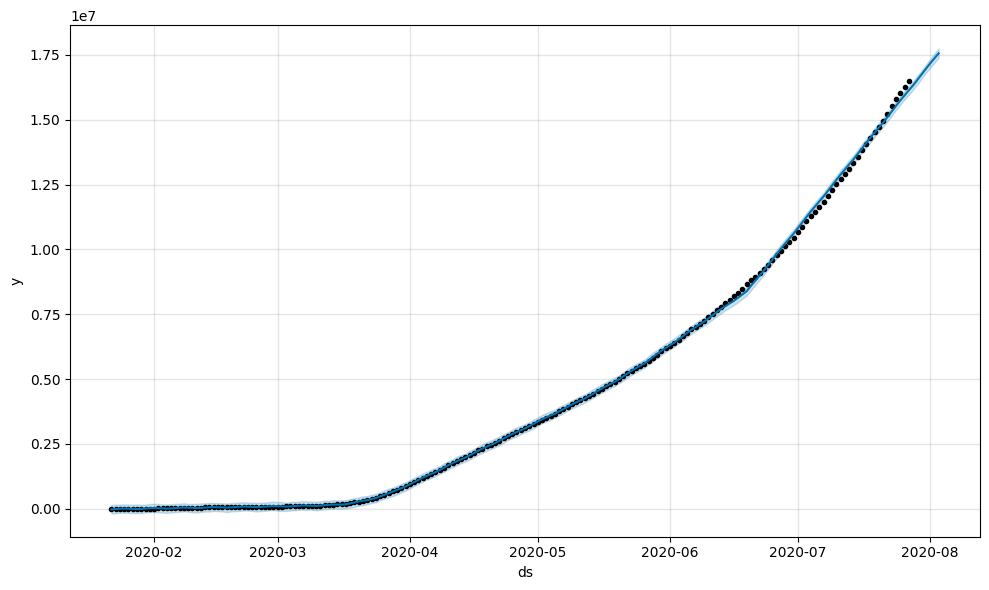

In [45]:
confirmed_forecast_plot = ml.plot(forecast)